In [4]:
# Let's load the provided dataset and inspect its structure, size, and basic statistics.
import pandas as pd
from sklearn import datasets


# Load the dataset
file_path = 'data2024b.csv'
data2024b = pd.read_csv(file_path)
data2024b.drop(columns=data2024b.columns[0], axis=1, inplace=True)

# Load Iris dataset
iris = datasets.load_iris()
iris_data = iris['data']
iris_target = iris['target']

data2024b
iris_data


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

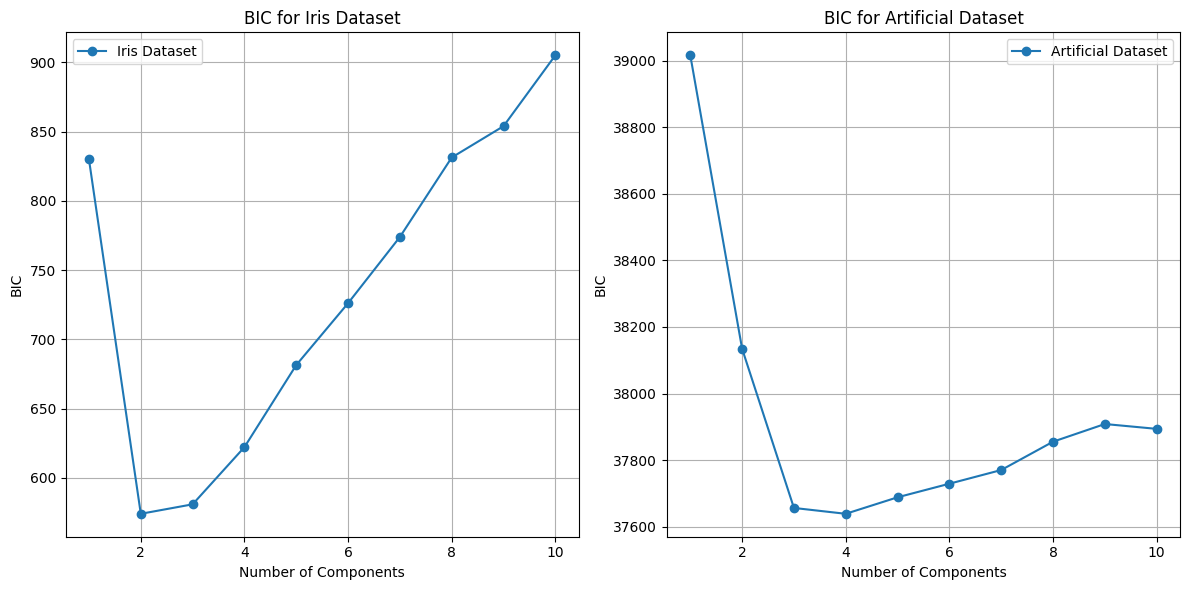

(np.int64(2), np.int64(4))

In [5]:
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


# Function to fit GMM and calculate BIC for different components
def fit_gmm_bic(data, max_components=10):
    bics = []
    models = []
    for n in range(1, max_components + 1):
        gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
        gmm.fit(data)
        bics.append(gmm.bic(data))
        models.append(gmm)
    return bics, models

# Fit GMM and calculate BIC for Iris dataset and artificial dataset
bic_iris, models_iris = fit_gmm_bic(iris_data)
bic_artificial, models_artificial = fit_gmm_bic(data2024b)

# Plot BIC scores for model selection
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), bic_iris, marker='o', label='Iris Dataset')
plt.title('BIC for Iris Dataset')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.legend()
plt.grid()


plt.subplot(1, 2, 2)
plt.plot(range(1, 11), bic_artificial, marker='o', label='Artificial Dataset')
plt.title('BIC for Artificial Dataset')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Extract the best number of components based on BIC
best_n_iris = np.argmin(bic_iris) + 1
best_n_artificial = np.argmin(bic_artificial) + 1

best_n_iris, best_n_artificial


In [14]:
# Extract the best models based on BIC
best_model_iris = models_iris[best_n_iris - 1]
best_model_artificial = models_artificial[best_n_artificial - 1]

# Extract parameters for Iris dataset (2 components)
means_iris = best_model_iris.means_
covariances_iris = best_model_iris.covariances_
weights_iris = best_model_iris.weights_

# Extract parameters for Artificial dataset (3 components)
means_artificial = best_model_artificial.means_
covariances_artificial = best_model_artificial.covariances_
weights_artificial = best_model_artificial.weights_

# Create a summary of parameters
iris_params = {
    "Means": means_iris,
    "Covariances": covariances_iris,
    "Weights": weights_iris
}

artificial_params = {
    "Means": means_artificial,
    "Covariances": covariances_artificial,
    "Weights": weights_artificial
}

print(f"iris_params: {iris_params}")
 
print(f"artificial_params: {artificial_params}")



iris_params: {'Means': array([[6.26198886, 2.87199642, 4.90597719, 1.67599129],
       [5.00600639, 3.4280142 , 1.46200203, 0.24599932]]), 'Covariances': array([[[0.43497387, 0.12094155, 0.44886533, 0.16550229],
        [0.12094155, 0.10961836, 0.14138002, 0.07923243],
        [0.44886533, 0.14138002, 0.67484296, 0.2858736 ],
        [0.16550229, 0.07923243, 0.2858736 , 0.17863587]],

       [[0.12176331, 0.09722605, 0.01602717, 0.01012447],
        [0.09722605, 0.14080279, 0.01146185, 0.00911288],
        [0.01602717, 0.01146185, 0.02955704, 0.00594818],
        [0.01012447, 0.00911288, 0.00594818, 0.0108851 ]]]), 'Weights': array([0.66667089, 0.33332911])}
artificial_params: {'Means': array([[-1.86423919, -0.7682027 ],
       [ 1.06343315,  0.41144274],
       [ 3.78506055,  1.61618553],
       [ 0.09363954, -1.40000839]]), 'Covariances': array([[[ 0.89064403, -0.29107149],
        [-0.29107149,  0.86002651]],

       [[ 0.85559296,  0.05636096],
        [ 0.05636096,  0.78159629]],


/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


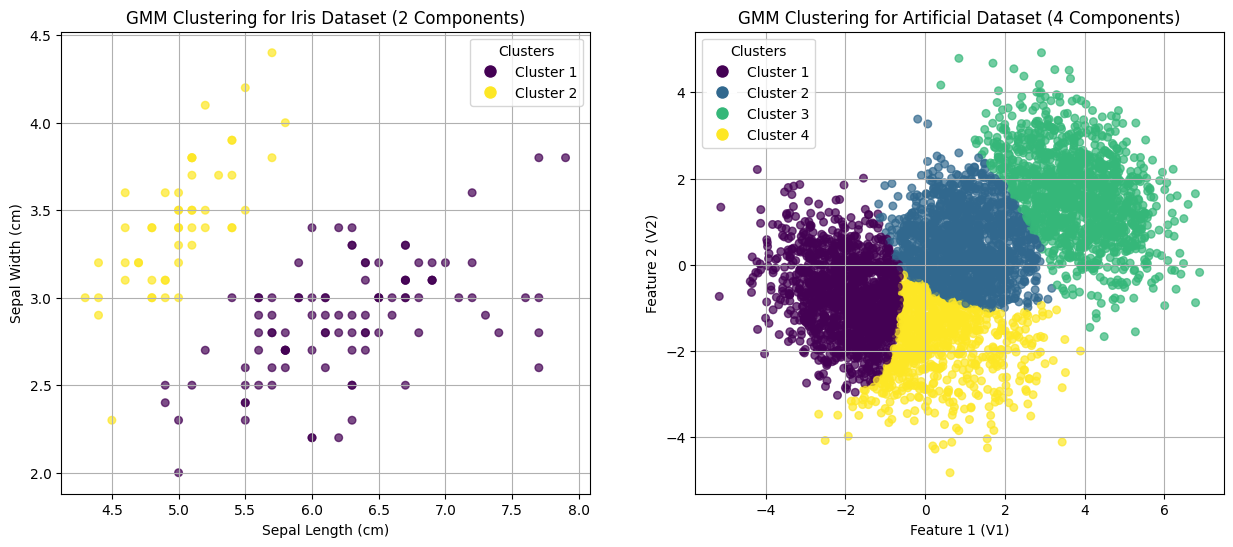

In [21]:
# Function to plot clusters
def plot_gmm_clusters(data, gmm, title, f1=None, f2=None, i=0, k=0):

    plt.subplot(1, 2, i)

    
    # Predict cluster labels based on the GMM
    cluster_labels = gmm.predict(data)
    
    # Plot the data points with cluster colors
    scatter =  plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', s=30, alpha=0.7)
    
    # Plot the cluster means
    #plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='black', s=100, marker='X', label='Cluster Centroids')
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(k)]
    plt.legend(handles, [f'Cluster {i+1}' for i in range(k)], title="Clusters")
    
    plt.title(title)
    plt.xlabel(f1)
    plt.ylabel(f2)
    #plt.legend()
    plt.grid(True)
    

plt.figure(figsize=(15, 6))

# Plot for Iris dataset (using first 2 dimensions)
plot_gmm_clusters(iris_data, best_model_iris, "GMM Clustering for Iris Dataset (2 Components)", 'Sepal Length (cm)', 'Sepal Width (cm)', 1,2)

# Plot for Artificial dataset (data2024b.csv)
plot_gmm_clusters(data2024b[['V1', 'V2']].values, best_model_artificial, "GMM Clustering for Artificial Dataset (4 Components)", 'Feature 1 (V1)', 'Feature 2 (V2)', 2,4)
plt.show()